# OpenAI API Labeling for Sequences

In [1]:
from advanced_preprocessing import *
from turn_signal_preprocessing import *
from sequence_openai_labeling_03 import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
results_computational = analyze_and_label_all_sequences(
    label_csv='../../labels_output/labels_lstm.csv',
    image_base_path='../../seq_img',
    fps=2.5,
    output_path='computational_results.json'
)

print(f"\nComputational Analysis Accuracy: {results_computational['accuracy']:.1%}")

seq_0000: True=right, Pred=right, ✓
seq_0001: True=left, Pred=left, ✓
seq_0002: True=left, Pred=left, ✓
seq_0003: True=right, Pred=right, ✓
seq_0004: True=right, Pred=right, ✓
seq_0005: True=left, Pred=left, ✓
seq_0006: True=left, Pred=left, ✓
seq_0007: True=right, Pred=right, ✓
seq_0008: True=right, Pred=right, ✓
seq_0009: True=left, Pred=left, ✓
seq_0010: True=hazard, Pred=hazard, ✓
seq_0011: True=none, Pred=none, ✓
seq_0012: True=none, Pred=none, ✓
seq_0013: True=none, Pred=none, ✓
seq_0014: True=none, Pred=hazard, ✗
seq_0015: True=none, Pred=left, ✗
seq_0016: True=none, Pred=none, ✓
seq_0017: True=none, Pred=none, ✓
seq_0018: True=none, Pred=none, ✓
seq_0019: True=none, Pred=hazard, ✗
seq_0020: True=none, Pred=none, ✓

Accuracy: 85.7% (18/21)

Computational Analysis Accuracy: 85.7%


In [3]:
df = pd.read_csv('../../labels_output/labels_lstm.csv')
test_seq = df[df['sequence_id'] == 'seq_0000'].sort_values('frame_idx')
test_paths = [str('../../seq_img' + p) for p in test_seq['crop_path'].tolist()]
true_label = test_seq['label'].iloc[0]

In [4]:
print(f"Testing with {len(test_paths)} frames")
print(f"True label: {true_label}")

Testing with 13 frames
True label: right


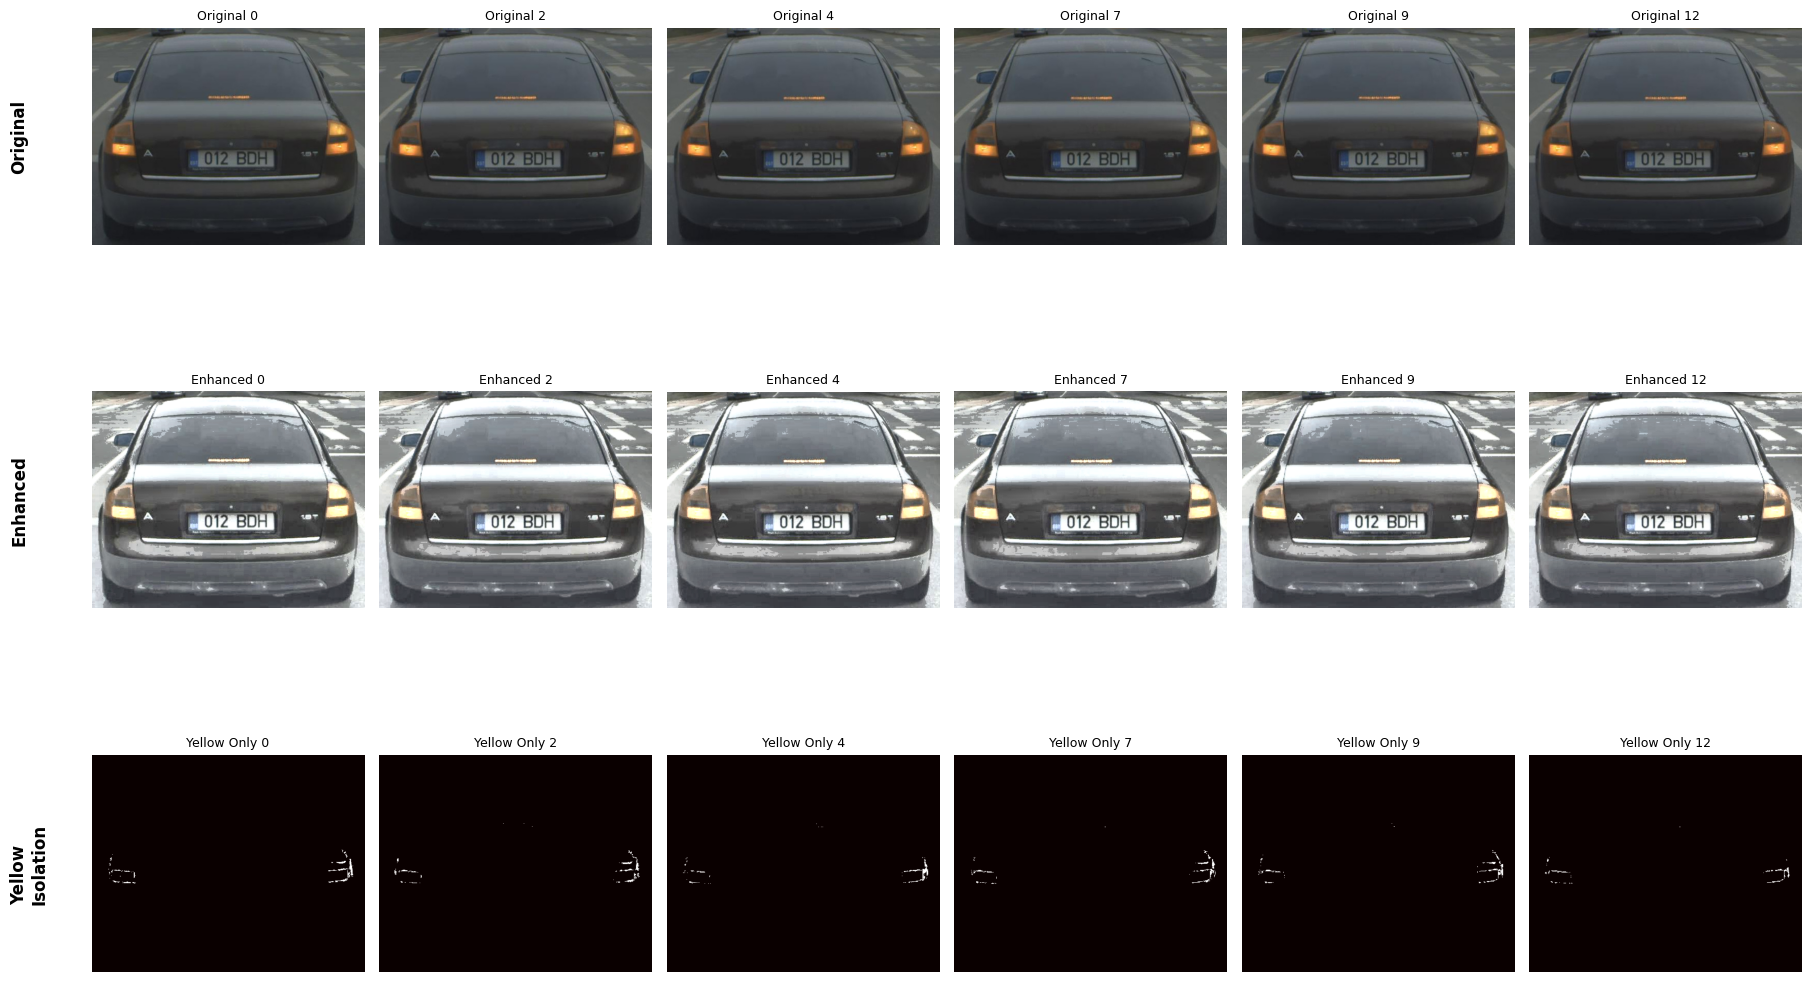

In [5]:
fig = visualize_enhancement_comparison(test_paths)
plt.show()

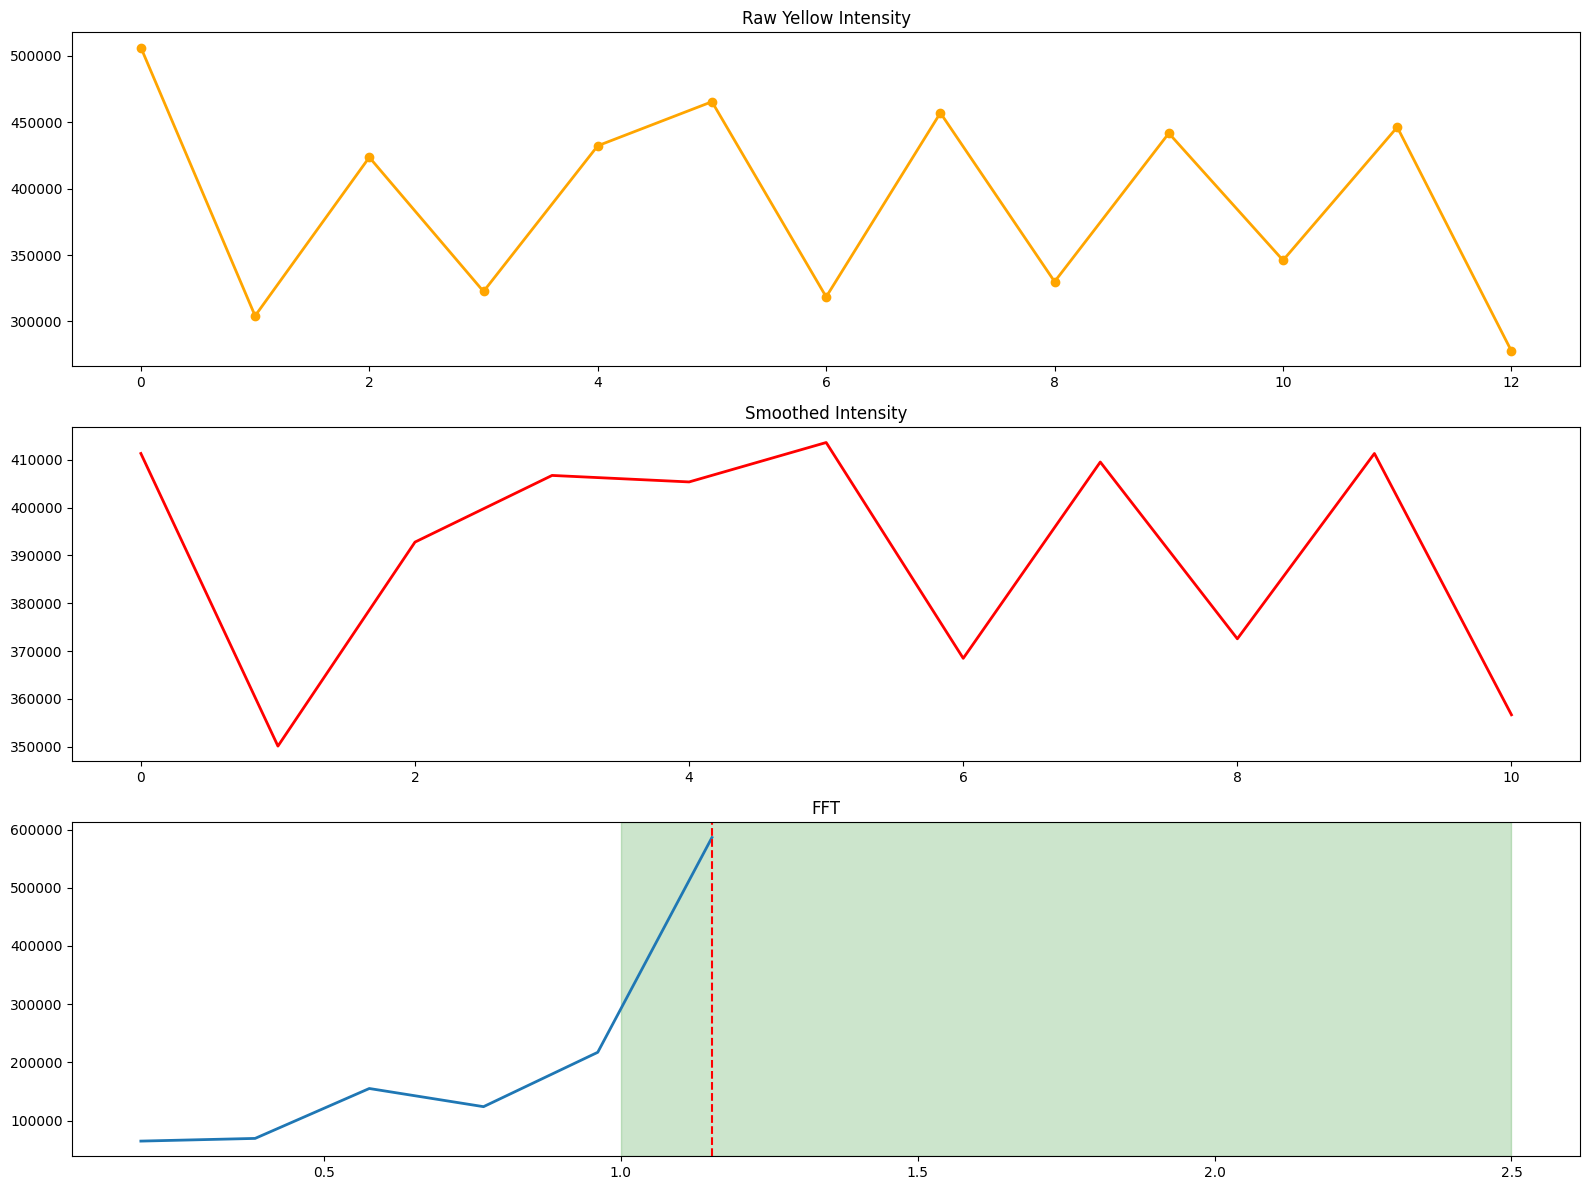

Is periodic: False
Peak frequency: 1.15 Hz


In [6]:
fig, periodic_result = visualize_yellow_intensity_analysis(test_paths, fps=2.5)
plt.show()
print(f"Is periodic: {periodic_result['is_periodic']}")
print(f"Peak frequency: {periodic_result['peak_frequency']:.2f} Hz")

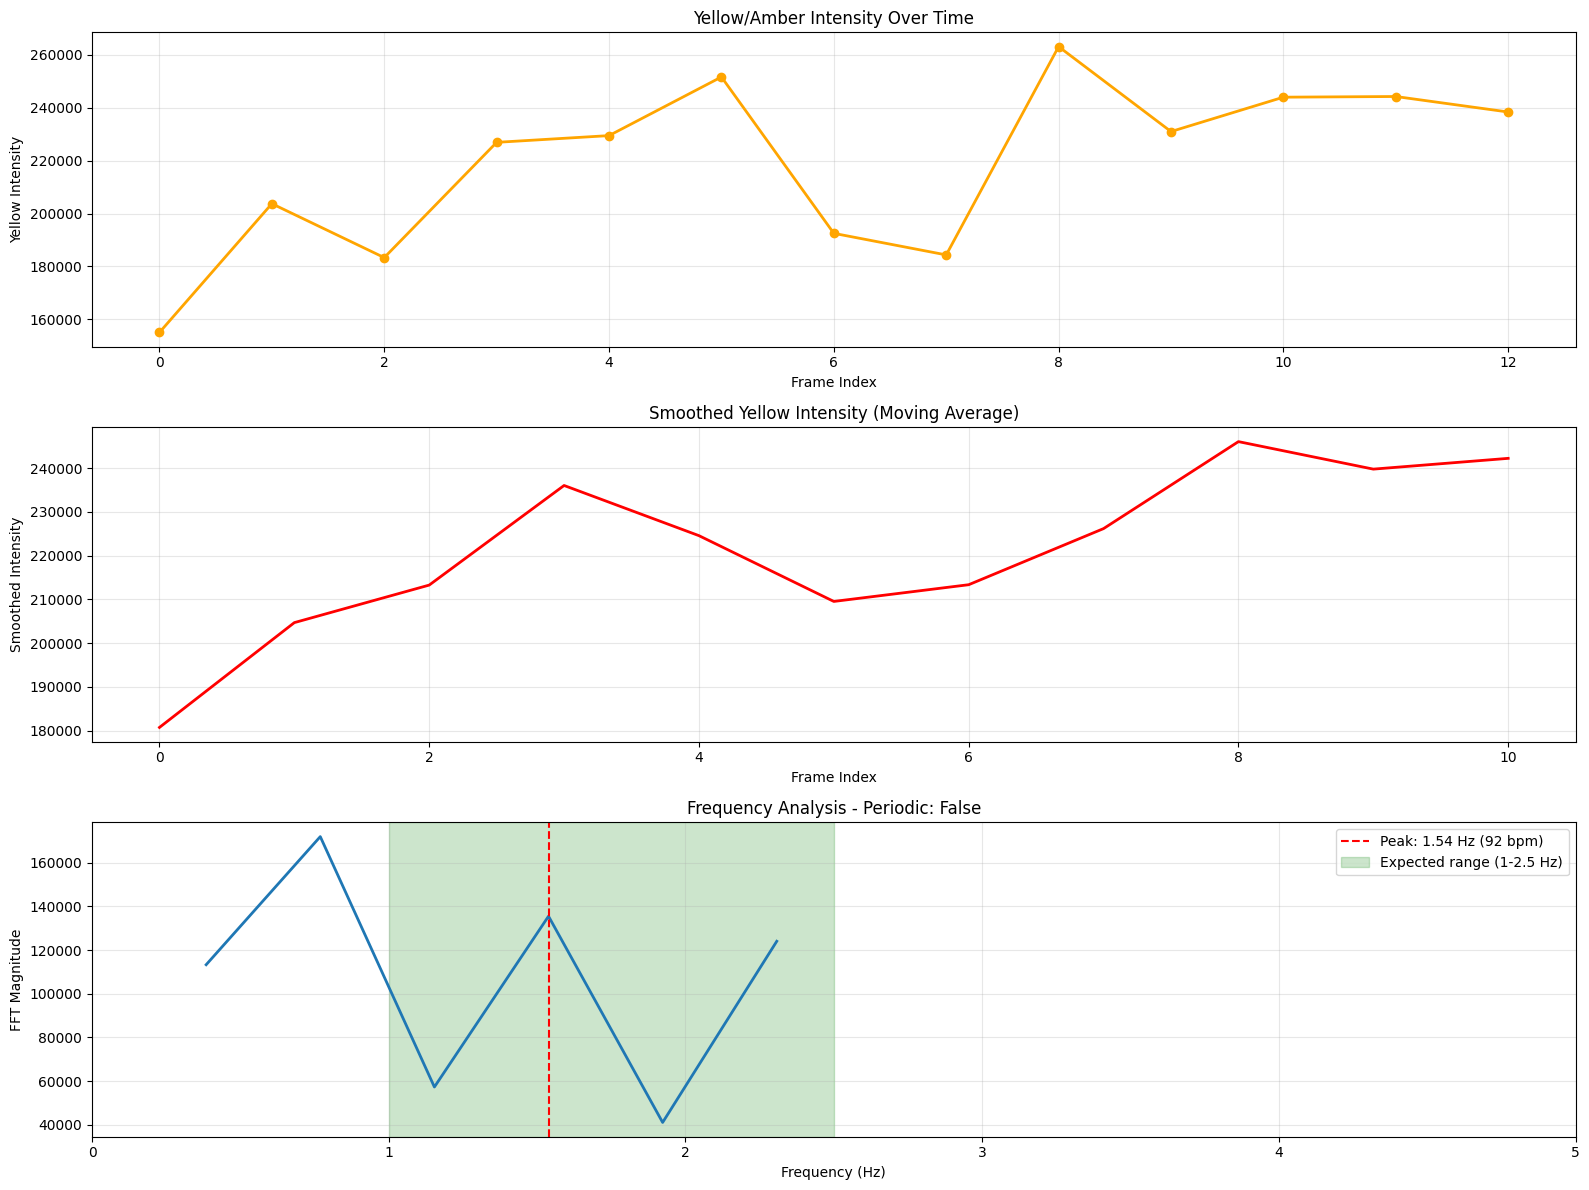


Predicted signal: hazard
Confidence: 50.00%


In [30]:
analysis = analyze_sequence_for_turn_signals(test_paths, fps=5.0, visualize=True)
print(f"\nPredicted signal: {analysis['predicted_signal']}")
print(f"Confidence: {analysis['confidence']:.2%}")

# OpenAI API

In [ ]:
df_results = process_all_sequences(
    label_csv="../labels.csv",
    method="grid",
    model="gpt-4o-mini",
    output_path="openai_labels.json",
)

# Visualization